In [7]:
import torch
import model
import numpy as np
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from pathlib import Path
import os 
from matplotlib import pyplot as plt
import pandas as pd
import yaml
import sys
import pickle
sys.path.append('./../..')
sys.path.append('./..')

try:
    %load_ext autoreload
    %autoreload 2
except:
    pass

DIR = 'us_import1'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def get_domain_dims(DIR):
    with open('./../../generated_data_v1/{}/domain_dims.pkl'.format(DIR), 'rb')  as fh:
        domain_dims = pickle.load(fh)
    return domain_dims

In [3]:
def get_training_data(DIR):
    x_pos = np.load('./../../generated_data_v1/{}/stage_2/train_x_pos.npy'.format(DIR))
    x_neg = np.load('./../../generated_data_v1/{}/stage_2/train_x_neg.npy'.format(DIR))
    return x_pos, x_neg

In [ ]:
# saved_model = None

# if saved_model is None:
#     model.train_model(x_pos,x_neg, batch_size=128, epochs=50)
#     model.save_model('saved_model/{}'.format(DIR))
# else:
#     saved_model_path = os.path.join('./saved_model/{}/{}'.format(DIR, saved_model))
#     model.load_model(saved_model_path)


In [4]:
ID_COL = 'PanjivaRecordID'
RESULTS_OP_PATH = 'APE_output'
RESULTS_OP_PATH = os.path.join(RESULTS_OP_PATH,DIR)
results_path = Path(RESULTS_OP_PATH)
results_path.mkdir(parents=True,exist_ok=True)

x_pos, x_neg = get_training_data(DIR)
x_neg = x_neg.reshape([x_pos.shape[0], -1 , x_pos.shape[1]])
domain_dims = get_domain_dims(DIR)
total_entity_count = sum(domain_dims.values())


In [8]:
emb_dim = 16
model_obj = model.APE( emb_dim, domain_dims)
container = model.APE_container(model_obj, device,  batch_size= 128,  LR = 0.001)

In [9]:
# if saved_model is None:
#     model.train_model(x_pos,x_neg, batch_size=128, epochs=50)
#     model.save_model('saved_model/{}'.format(DIR))
# else:
#     saved_model_path = os.path.join('./saved_model/{}/{}'.format(DIR, saved_model))
#     model.load_model(saved_model_path)

container.model_obj.mode='train'
test_df = pd.read_csv(
    './../../generated_data_v1/{}/stage_2/test_serialized.csv'.format(DIR),
    index_col=None
)

In [12]:
loss1 = container.train_model(
    x_pos, 
    x_neg, 
    num_epochs=10,
    tol = 0.1
)

 20%|█▉        | 102/518 [00:07<00:28, 14.54it/s, Batch =102]

Epoch 0 Batch 100 Loss 5.9126


 39%|███▉      | 202/518 [00:13<00:21, 14.80it/s, Batch =202]

Epoch 0 Batch 200 Loss 5.2000


 58%|█████▊    | 302/518 [00:20<00:15, 13.98it/s, Batch =302]

Epoch 0 Batch 300 Loss 4.9024


 78%|███████▊  | 402/518 [00:28<00:07, 14.67it/s, Batch =402]

Epoch 0 Batch 400 Loss 4.6157


 97%|█████████▋| 502/518 [00:35<00:01, 14.54it/s, Batch =502]

Epoch 0 Batch 500 Loss 4.5219


  0%|          | 2/518 [00:00<00:36, 14.23it/s, Batch =3]

Mean epoch loss 5.1114


 20%|█▉        | 102/518 [00:07<00:28, 14.36it/s, Batch =102]

Epoch 1 Batch 100 Loss 4.1963


 39%|███▉      | 202/518 [00:14<00:22, 13.77it/s, Batch =202]

Epoch 1 Batch 200 Loss 3.9862


 58%|█████▊    | 302/518 [00:21<00:15, 13.79it/s, Batch =302]

Epoch 1 Batch 300 Loss 4.0091


 78%|███████▊  | 402/518 [00:28<00:08, 13.62it/s, Batch =402]

Epoch 1 Batch 400 Loss 3.9080


 97%|█████████▋| 502/518 [00:35<00:01, 13.85it/s, Batch =502]

Epoch 1 Batch 500 Loss 4.0053


  0%|          | 2/518 [00:00<00:38, 13.57it/s, Batch =3]

Mean epoch loss 4.1029


 20%|█▉        | 102/518 [00:07<00:31, 13.38it/s, Batch =102]

Epoch 2 Batch 100 Loss 3.7806


 39%|███▉      | 202/518 [00:14<00:23, 13.61it/s, Batch =202]

Epoch 2 Batch 200 Loss 3.7232


 58%|█████▊    | 302/518 [00:21<00:14, 14.47it/s, Batch =302]

Epoch 2 Batch 300 Loss 3.6974


 78%|███████▊  | 402/518 [00:28<00:08, 14.06it/s, Batch =402]

Epoch 2 Batch 400 Loss 3.6219


 97%|█████████▋| 502/518 [00:35<00:01, 14.45it/s, Batch =502]

Epoch 2 Batch 500 Loss 3.5534


  0%|          | 2/518 [00:00<00:36, 14.24it/s, Batch =3]

Mean epoch loss 3.7006


 20%|█▉        | 102/518 [00:07<00:29, 14.00it/s, Batch =102]

Epoch 3 Batch 100 Loss 3.4661


 39%|███▉      | 202/518 [00:14<00:22, 14.06it/s, Batch =202]

Epoch 3 Batch 200 Loss 3.4697


 58%|█████▊    | 302/518 [00:21<00:15, 13.83it/s, Batch =302]

Epoch 3 Batch 300 Loss 3.4851


 78%|███████▊  | 402/518 [00:29<00:08, 14.35it/s, Batch =402]

Epoch 3 Batch 400 Loss 3.4409


 97%|█████████▋| 502/518 [00:36<00:01, 14.07it/s, Batch =502]

Epoch 3 Batch 500 Loss 3.4375


  0%|          | 2/518 [00:00<00:47, 10.97it/s, Batch =2]

Mean epoch loss 3.4741


 20%|█▉        | 102/518 [00:07<00:26, 15.54it/s, Batch =103]

Epoch 4 Batch 100 Loss 3.3572


 39%|███▉      | 202/518 [00:14<00:19, 15.99it/s, Batch =203]

Epoch 4 Batch 200 Loss 3.3207


 58%|█████▊    | 302/518 [00:21<00:15, 14.28it/s, Batch =302]

Epoch 4 Batch 300 Loss 3.2964


 78%|███████▊  | 402/518 [00:28<00:08, 14.31it/s, Batch =402]

Epoch 4 Batch 400 Loss 3.2696


 97%|█████████▋| 502/518 [00:35<00:01, 13.91it/s, Batch =502]

Epoch 4 Batch 500 Loss 3.2173


  0%|          | 2/518 [00:00<00:37, 13.89it/s, Batch =3]

Mean epoch loss 3.3181


 20%|█▉        | 102/518 [00:07<00:29, 14.29it/s, Batch =102]

Epoch 5 Batch 100 Loss 3.2215


 39%|███▉      | 202/518 [00:14<00:22, 13.93it/s, Batch =202]

Epoch 5 Batch 200 Loss 3.1875


 58%|█████▊    | 302/518 [00:21<00:15, 14.40it/s, Batch =302]

Epoch 5 Batch 300 Loss 3.1353


 78%|███████▊  | 402/518 [00:28<00:08, 14.23it/s, Batch =402]

Epoch 5 Batch 400 Loss 3.1533


 97%|█████████▋| 502/518 [00:35<00:01, 14.43it/s, Batch =502]

Epoch 5 Batch 500 Loss 3.1179


  0%|          | 2/518 [00:00<00:35, 14.44it/s, Batch =3]

Mean epoch loss 3.1963


 20%|█▉        | 102/518 [00:07<00:29, 14.32it/s, Batch =102]

Epoch 6 Batch 100 Loss 3.0627


 39%|███▉      | 202/518 [00:14<00:21, 14.48it/s, Batch =202]

Epoch 6 Batch 200 Loss 3.1424


 58%|█████▊    | 302/518 [00:20<00:14, 14.42it/s, Batch =302]

Epoch 6 Batch 300 Loss 3.1706


 78%|███████▊  | 402/518 [00:27<00:08, 14.14it/s, Batch =402]

Epoch 6 Batch 400 Loss 3.0456


 97%|█████████▋| 502/518 [00:34<00:01, 14.68it/s, Batch =502]

Epoch 6 Batch 500 Loss 3.0559


  0%|          | 2/518 [00:00<00:34, 14.77it/s, Batch =3]

Mean epoch loss 3.0944


 20%|█▉        | 102/518 [00:07<00:28, 14.42it/s, Batch =102]

Epoch 7 Batch 100 Loss 3.0106


 39%|███▉      | 202/518 [00:13<00:22, 14.13it/s, Batch =202]

Epoch 7 Batch 200 Loss 3.0325


 58%|█████▊    | 302/518 [00:21<00:14, 14.42it/s, Batch =303]

Epoch 7 Batch 300 Loss 3.0279


 78%|███████▊  | 402/518 [00:28<00:08, 14.28it/s, Batch =402]

Epoch 7 Batch 400 Loss 3.0391


 97%|█████████▋| 502/518 [00:35<00:01, 14.20it/s, Batch =502]

Epoch 7 Batch 500 Loss 2.9582


  0%|          | 2/518 [00:00<00:35, 14.59it/s, Batch =3]

Mean epoch loss 3.0069


 20%|█▉        | 102/518 [00:07<00:28, 14.60it/s, Batch =102]

Epoch 8 Batch 100 Loss 2.9214


 39%|███▉      | 202/518 [00:14<00:22, 14.33it/s, Batch =202]

Epoch 8 Batch 200 Loss 2.9476


 58%|█████▊    | 302/518 [00:21<00:15, 14.03it/s, Batch =302]

Epoch 8 Batch 300 Loss 2.8955


 78%|███████▊  | 402/518 [00:28<00:08, 14.31it/s, Batch =402]

Epoch 8 Batch 400 Loss 2.9371


 97%|█████████▋| 502/518 [00:35<00:01, 14.33it/s, Batch =502]

Epoch 8 Batch 500 Loss 2.8625


  0%|          | 2/518 [00:00<00:35, 14.70it/s, Batch =3]

Mean epoch loss 2.9326
Stopping!


 20%|█▉        | 102/518 [00:07<00:29, 14.21it/s, Batch =102]

Epoch 9 Batch 100 Loss 2.8937


 39%|███▉      | 202/518 [00:14<00:21, 14.45it/s, Batch =202]

Epoch 9 Batch 200 Loss 2.8845


 58%|█████▊    | 302/518 [00:21<00:15, 14.17it/s, Batch =302]

Epoch 9 Batch 300 Loss 2.8956


 78%|███████▊  | 402/518 [00:28<00:08, 14.24it/s, Batch =402]

Epoch 9 Batch 400 Loss 2.8378


 97%|█████████▋| 502/518 [00:35<00:01, 13.99it/s, Batch =502]

Epoch 9 Batch 500 Loss 2.8453


100%|██████████| 518/518 [00:36<00:00, 14.26it/s, Batch =518]

Mean epoch loss 2.8694
Stopping!


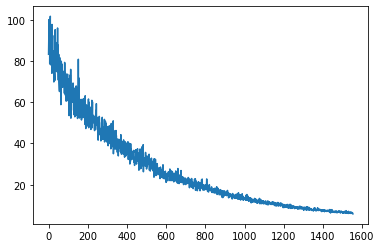

In [11]:
plt.plot(np.arange(len(loss +loss1)),loss+loss1)

In [ ]:
container.save_model()